# CS 436 / 536: Introduction to Machine Learning
# Spring 2025

## Similarity Based Methods

##### This file relies upon several functions implemented previously in the notebook on Linear Models and Regularization and Validation.

In [ ]:
# TODO-1: Import necessary functions, packages to load the MNIST data

In [2]:
'''
Init

This is a HACK!
'''

execute = True
execute

True

## Read MNIST Digits Dataset

In [3]:
'''
Read training and test datasets
'''
if execute:
    Xdigitstrain, ydigitstrain = readData('ZipDigits.train')

    Ndigitstrain, pixels = Xdigitstrain.shape

    assert(Ndigitstrain == ydigitstrain.shape[0])

    print(f'Xdigitstrain shape {Xdigitstrain.shape}, ydigitstrain shape {ydigitstrain.shape}')

X shape: (7291, 256)
y shape: (7291, 1)
Xdigitstrain shape (7291, 256), ydigitstrain shape (7291, 1)


In [4]:
if execute:
    Xdigitstest, ydigitstest = readData('ZipDigits.test')

    Ndigitstest, pixels = Xdigitstest.shape

    assert(Ndigitstest == ydigitstest.shape[0])

    print(f'Xdigitstest shape {Xdigitstest.shape}, ydigitstest shape {ydigitstest.shape}')

X shape: (2007, 256)
y shape: (2007, 1)
Xdigitstest shape (2007, 256), ydigitstest shape (2007, 1)


## Feature Normalization

### Compute 'Augmented' Feature Matrix

In [5]:
if execute:
    print('Computing augmented training feature matrix')

    Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

    Naugtrain, d = Xaugtrain.shape

    print(f'Xaugtrain shape {Xaugtrain.shape}')

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Xaugtrain shape (7291, 3)


In [6]:
if execute:
    print('Computing augmented test feature matrix')

    Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

    Naugtest, d = Xaugtest.shape

    print(f'Xaugtest shape {Xaugtest.shape}')

Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)
Xaugtest shape (2007, 3)


### Combine Data

In [7]:
if execute:
    Xaug = np.concatenate((Xaugtrain, Xaugtest), axis=0)
    Naug, d = Xaug.shape
    ycombined = np.concatenate((ydigitstrain, ydigitstest), axis=0)

    assert(Xaug.shape[0] == Ndigitstrain + Ndigitstest)
    assert(ycombined.shape[0] == Ndigitstrain + Ndigitstest)

    print(f'Xaug shape {Xaug.shape}, ycombined shape {ycombined.shape}')

Xaug shape (9298, 3), ycombined shape (9298, 1)


### Normalize Features

In [8]:
if execute:
    Xnorm = normalize(Xaug)
    N, d = Xnorm.shape
    print(Xnorm.shape)

    assert(Xnorm.shape == Xaug.shape)
    assert(np.all( Xnorm[:, 0] == np.ones((N, 1)) ))

(9298, 3)


### Setup Labels for the 1s vs Non 1s Classification Task

In [9]:
if execute:
    for n in range(N):
        if ycombined[n, 0] == 1:
            ycombined[n, 0] = 1
        else:
            ycombined[n, 0] = -1

## Train-Test Split

### Randomly select $K$ data points from the input data

In [10]:
if execute:
    X, y, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 300)

    print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
    X shape {X.shape} y shape {y.shape}\n\
    Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
    X shape (300, 3) y shape (300, 1)
    Xtest shape (8998, 3), ytest shape (8998, 1)


### Visualize the Data

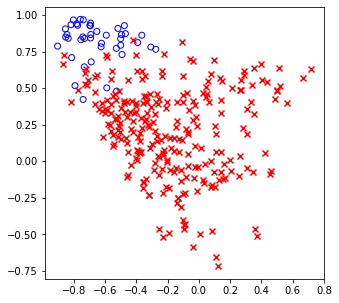

In [11]:
if execute:
    fig, axs = plt.subplots(figsize=(5, 5))
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')

## Computing Distances

In [ ]:
def vec2vecDistance(x, xprime, ord=2):
    '''
    Compute distance between two vectors
    Input:
        x: a d-dimensional numpy vector
        xprime: a d-dimensional vector
        ord: order of the norm used to compute distance
    Output:
        distance: a real number
    '''
    '''
    TODO-2:
    return ?
    Hint: See numpy.linalg.norm(..., ord=2)
    '''

In [ ]:
def vec2matDistances(x, X, ord=2):
    '''
    Compute distance between two vectors
    Input:
        x: a d-dimensional numpy vector
        X: a 2D N x d numpy array
        ord: order of the norm used to compute distance
    Output:
        distances: a 2D N x 1 numpy array of distances from x to data points in X
    '''
    '''
    TODO-3:
    return ?
    Hint: See numpy.linalg.norm(..., axis=1)
    '''

## Computing Error

In [ ]:
def classificationError(y, yhat):
    '''
    The (mis)classification error
    Input:
        y: a 2D N x 1 numpy array
        yhat: a 2D N x 1 numpy array
    Output:
        error: a real number, fraction of examples at which the value in y is not equal to the value in y
    '''
    N, d = y.shape
    '''
    TODO-4: implement codes to calculate error
    '''
    return error

In [22]:
def regressionError(y, yhat):
    '''
    The (mis)classification error
    Input:
        y: a 2D N x 1 numpy array
        yhat: a 2D N x 1 numpy array
    Output:
        error: sum of squared "errors", the differences between the values in y and yhat
    '''
    N, d = y.shape
    error = (1/N) * ( np.matmul(yhat.T, yhat) - 2*np.matmul(yhat.T, y) + np.matmul(y.T, y) )[0, 0]
    return error

## The $k$ Nearest Neighbors Rule

### The Algorithm

In [ ]:
def kNN(X, y, xtest, k=3):
    '''
    The k Nearest Neighbors Algorithm
    Input:
        X: a 2D N x d numpy array
        y: a 2D N x 1 numpy array
        xtest: a d dimensional vector
        k: positive integer
    Output:
        ytest: prediction on xtest using the k Nearest Neighbors Algorithms and dataset X, y
    '''
    distances = vec2matDistances(xtest, X)
    '''
    TODO-5:
    kNeighbors = ?
    Hint: indices of the k nearest neighbors of xtest in X, see numpy.argpartition()
    
    TODO-6:
    ytest = ?
    Hint: Compute the average of the y values of the k nearest neighbors
    '''
    return ytest

### Making Predictions

In [ ]:
def predictClasskNN(X, y, Xtest, k=3):
    '''
    Predict class using the k Nearest Neighbors Algorithm
    Input:
        X: a 2 dimensional N x d numpy array
        y: a 2 dimensional N x 1 numpy array
        Xtest: a 2D Ntest x d numpy array
        k: positive integer
    Output:
        ytest: a 2D Ntest x 1 anumpy array of predicted classes of examples in Xtest
    '''
    N, d = Xtest.shape
    yhat = np.zeros((N, 1))
    for n in range(N):
        xtest = Xtest[n, :]
        '''
        TODO-7:
        yhat[n, 0] = np.sign(?)
        '''
    return yhat

### Plotting the Decision Boundary of the $k$ Nearest Neighbors Rule

In [25]:
def plotkNNSeparator(X, y, k=3, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by the k Nearest Neighbors Algorithm
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0], ..., X[n, d-1] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        k: positive integer
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 250)
    pltx2s = np.linspace(-1, 1, 250)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    pltyhat = predictClasskNN(X, y, pltX, k=k)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.show()

C:\Users\sujoy\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


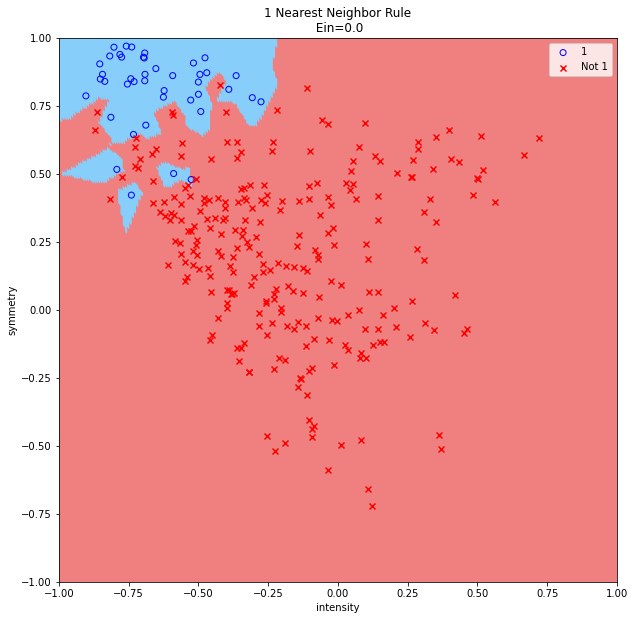

In [27]:
k=1

yhat = predictClasskNN(X, y, X, k=k)
Ein = classificationError(y, yhat)

plotkNNSeparator(X, y, k=k, title=f'{k} Nearest Neighbor Rule\n Ein={Ein}')

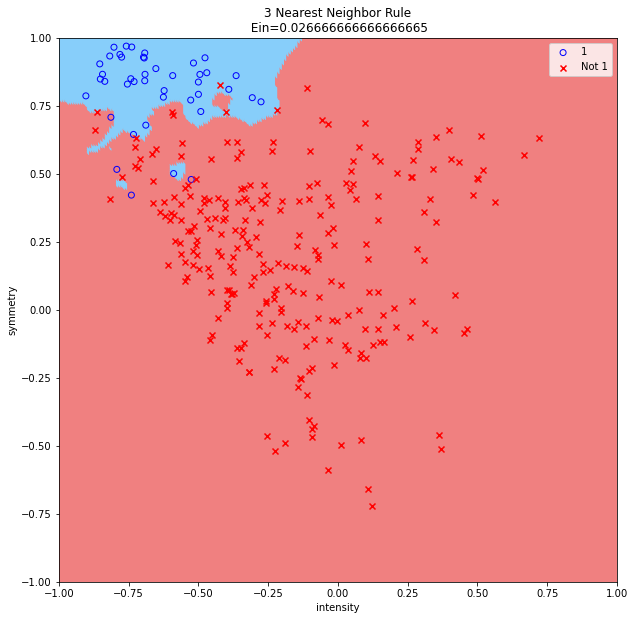

In [28]:
k=3

yhat = predictClasskNN(X, y, X, k=3)
Ein = classificationError(y, yhat)

plotkNNSeparator(X, y, k=k, title=f'{k} Nearest Neighbor Rule\n Ein={Ein}')

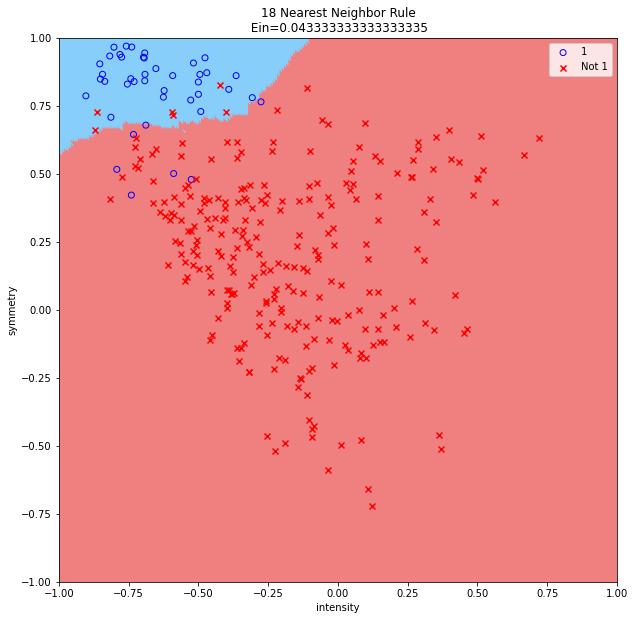

In [29]:
N, d = X.shape
k = np.ceil(np.sqrt(N)).astype(int)

yhat = predictClasskNN(X, y, X, k=k)
Ein = classificationError(y, yhat)

plotkNNSeparator(X, y, k=k, title=f'{k} Nearest Neighbor Rule\n Ein={Ein}')

## $k$ Means Clustering

### Lloyd's Algorithm

#### Greedy Algorithm to Pick Initial Centers

In [30]:
def kSeparatedPointsGreedy(X, k=3):
    '''
    Select k data points from X that are far from each other
    Input:
        X: a 2D N x d numpy array
    Output:
        S: a 2D k x d numpy array
    '''    
    N, d = X.shape
    if k == N:
        return X
    S = np.zeros((k, d))
    for j in range(k):
        if j == 0:
            '''
            Add a random point to S
            '''
            idx = np.random.randint(low=0, high=N)
            S[0, :] = X[idx, :]
            continue
        '''
        Add a point from X that is farthest away from its nearest neighbor in S
        '''
        Selected = S[:j-1, :].reshape((j-1, d))
        distancesXtoS = np.zeros((N, 1))
        for n in range(N):
            x = X[n, :]
            distances_x_to_S = vec2matDistances(x, S)
            distancesXtoS[n, 0] = np.min(distances_x_to_S)
        idx = np.argmax(distancesXtoS)
        S[j, :] = X[idx, :]
    return S

#### Compute Cluster Membership Given Cluster Centers

In [31]:
def clusterMembership(centers, X):
    '''
    Given k cluster centers, identify for each data point in X, which cluster it belongs to
    Input:
        centers: a 2D k x d numpy array of k cluster centers in d-dimensional space
        X: a 2D N x d numpy array of N data points in d-dimensional space
    Output:
        membership: a 2D N x 1 numpy array, specifying the cluster to which each data point in X belongs
                    membership[n, 0] is an integer specifying which one of k clusters the n-th data point in X belongs to
    '''
    k, d = centers.shape
    N, dprime = X.shape
    assert(d == dprime)
    membership = np.zeros((N, 1)).astype(int)
    for n in range(N):
        x = X[n, :]
        distances_x_to_centers = vec2matDistances(x, centers)
        membership[n, 0] = np.argmin(distances_x_to_centers)
    return membership

In [32]:
def getClusterMembers(centers, X):
    '''
    Compute cluster membership
    Input:
        centers: a 2D k x d numpy array, k centers
        X: a 2D N x d numpy array, N data points
    Output:
        S: a list of length k; 
           for each j=0,...,k-1, S[j] is a 2D numpy array with d columns 
           consisting of data points from X closest to center j
        members: a list of length k; 
                 for each j=0,...,k-1, members[j] is a list of indices of rows in X closest to the j-th center
    '''
    k, d = centers.shape
    N, dprime = X.shape
    assert(d == dprime)
    membership = clusterMembership(centers, X)
    S = []
    members = []
    for j in range(k):
        idxs = [n for n in range(N) if membership[n, 0] == j]
        Sj = X[idxs, :]
        S.append(Sj)
        members.append(idxs)
    return S, members

#### Compute Cluster Error

##### Given:

$k$ cluster centers $\mu_1,\dots,\mu_k$, and

$N$ data points from a dataset $X$

##### Want:

Compute the cluster error:

$E_{\text{in}}(x_1,\dots,x_N; \mu_1,\dots,\mu_k)=\sum_{n=1}^N\left\| x_n - \mu(x_n) \right\|^2$, where $\mu(x_n)$ is the cluster center closest to $x_n$ among the $k$ cluster centers $\mu_1,\dots,\mu_k$.

Equivalent to:

When $S_1,\dots,S_k$ is a $k$-partition of $X$, where for each $j\in\{1,\dots,k\}$, $S_j$ is the set of data points in $X$ belonging to cluster $j$, i.e., that are closer to $\mu_j$ than any other cluster center.

$E_{\text{in}}(S_1,\dots,S_k; \mu_1,\dots,\mu_k)=\sum_{j=1}^N E_j$, where $E_j=\sum_{n:x_n\in S_j}\left\| x_n - \mu_j \right\|^2$

In [ ]:
def clusterError(centers, X):
    '''
    Compute the cluster error
    Input:
        centers: a 2D k x d numpy array, k centers
        X: a 2D N x d numpy array, N data points
    Output:
        E: a real number, the cluster error
    '''
    k, d = centers.shape
    N, dprime = X.shape
    assert(d == dprime)
    membership = clusterMembership(centers, X)
    E = 0
    for n in range(N):
        cluster = membership[n, 0]
        center = centers[cluster, :]
        x = X[n, :]
        '''
        TODO-8:
        E += ?
        Hint: you will have to compute the square of the distance from x to center
        '''
        
    return E

In [34]:
def clusterStats(centers, X):
    '''
    Print some useful stats about a clustering of X defined by centers
    Input:
        centers: a 2D k x d numpy array, k centers
        X: a 2D N x d numpy array, N data points
    Output:
        None
    '''
    k, d = centers.shape
    N, dprime = X.shape
    assert(d == dprime)
    membership = clusterMembership(centers, X)
    E = clusterError(centers, X)
    S, membership = getClusterMembers(centers, X)
    print(f'centers shape {k, d}\ndata shape {N, dprime}\ncluster error {E}\n')
    for j in range(k):
        Nj, dj = S[j].shape
        Ej = clusterError(centers[j, :].reshape((1, d)), S[j])
        print(f'Cluster {j} has {Nj} members with cluster error {Ej}')
    return None

#### Plot Clusters

In [35]:
def plotClusters(centers, X, title=''):
    '''
    Plot clusters and cluster centers
    Input:
        centers: a 2D k x d numpy array, k centers
        X: a 2D N x d numpy array, N data points
        title: a string
    Output:
        None
    '''
    k, d = centers.shape
    N, dprime = X.shape
    assert(d == dprime)
    membership = clusterMembership(centers, X)
    S, members = getClusterMembers(centers, X)
    cmap = plt.get_cmap("tab10")
    fig, axs = plt.subplots(figsize=(10, 10))
    for j in range(k):
        pltx = S[j][:, 1]
        plty = S[j][:, 2]
        axs.scatter(pltx, plty, marker='x', color=cmap(float(j)/k), alpha=0.5, label=f'cluster {j}')
        pltxcenter = centers[j, 1]
        pltycenter = centers[j, 2]
        axs.scatter(pltxcenter, pltycenter, s=100, marker='o', color=cmap(float(j)/k), label=f'cluster {j} center')
    axs.legend()
    axs.set_title(title)
    plt.tight_layout()
    plt.show()

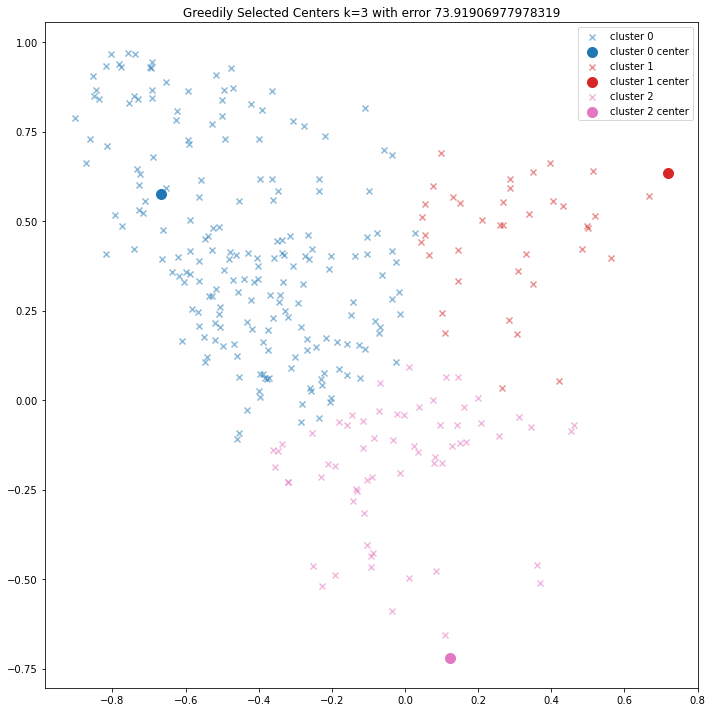

In [36]:
k = 3
centers = kSeparatedPointsGreedy(X, k=k)
error = clusterError(centers, X)
plotClusters(centers, X, title=f'Greedily Selected Centers k={k} with error {error}')

#### Lloyd's Algorithm

1. Start with cluster centers using the greedy algorithm
2. Compute cluster membership
3. Update cluster centers
4. Compute cluster error and repeat 2 and 3 until cluster error stops decreasing

In [ ]:
def clusterLloyds(X, k=3, tol=0.000001):
    '''
    Lloyd's algorithm for clustering
    Input:
        X: a 2D N x d numpy array
        k: an integer, the desired number of clusters
    Output:
        centers: a 2D k x d numpy array of k cluster centers in d-dimensional space
    '''
    # Initialize cluster centers
    centers = kSeparatedPointsGreedy(X, k=k)
    N, d = X.shape
    error = clusterError(centers, X)
    errors = [error]
    while 1:
        # Construct clusters S[j] for each j = 1, ..., k
        S, members = getClusterMembers(centers, X)
        # Update cluster centers
        for j in range(k):
            '''
            TODO-9:
            centers[j, :] = ?
            '''
        # Compute cluster error
        '''
        TODO-10:
        E = ?
        '''
        errors.append(E)
        if errors[-1] < errors[-2] + tol:
            break
    print(f'completed {k} clusters with cluster error {errors[-1]}')
    return centers

completed 3 clusters with cluster error 28.783313569466458


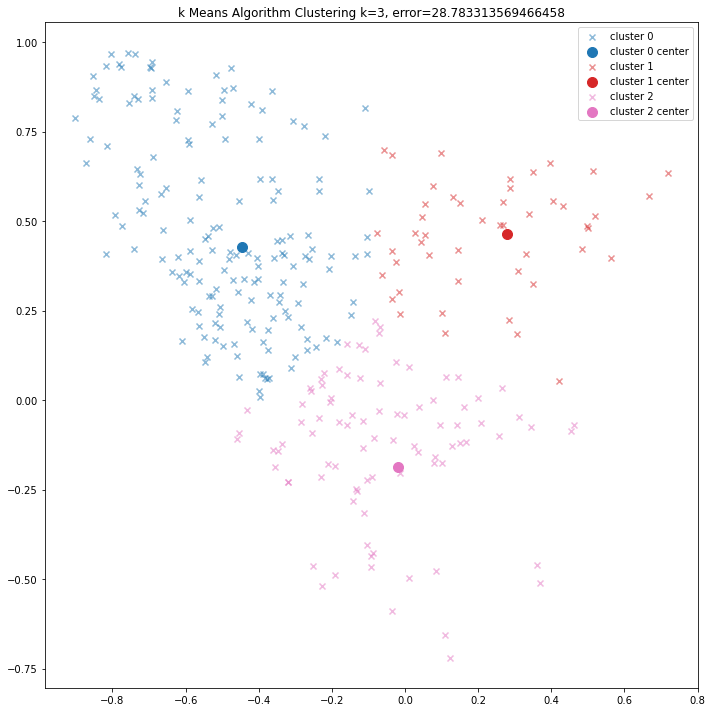

In [38]:
k = 3
centers = clusterLloyds(X, k=k)
error = clusterError(centers, X)
plotClusters(centers, X, title=f'k Means Algorithm Clustering k={k}, error={error}')

## Radial Basis Functions

### The Gaussian Kernel

$\phi_{\text{Gauss}}(s)=e^{-\frac{1}{2}s^2}$

In [ ]:
def GaussianKernel(s):
    '''
    The Gaussian kernel
    Input:
        s: a real number or numpy vector
    Output:
        a real number or numpy vector (depending on the input) of the Gaussian kernel applied to the input
    '''
    '''
    TODO-11:
    return ?
    '''

### Nonparametric RBF

Given a dataset $X$, $y$, and a test data point $x$

$h(x)=\sum_{n=1}^N w_n(x)\phi\big(\frac{\left\| x-x_n \right\|}{r}\big)$

where $x_n$ is the $n$-th data point in $X$,

and $w_n(x)=\frac{y_n}{\sum_{m=1}^N\phi\big(\frac{\left\|x-x_m\right\|}{r}\big)}$

#### The Hypothesis

In [40]:
def nonparametricRBF(X, y, xtest, r=0.1):
    '''
    The nonparametric RBF function
    Input:
        centers: a 2D k x d numpy array, k centers
        X: a 2D N x d numpy array, N data points
        xtest: a d-dimensional numpy vector
        r: a real number
    Output:
        yhat: a real number, the prediction of the nonparametric RBF on data point xtest
    '''
    N, d = X.shape
    distances = vec2matDistances(xtest, X)
    distances = distances / r
    norm = np.sum(distances)
    ztest = GaussianKernel(distances)
    w = y / norm
    yhat = np.matmul(w.T, ztest)
    return yhat

#### Making Predictions

In [41]:
def predictClassNonparametricRBF(X, y, Xtest, r=0.1):
    '''
    Input:
        X: a 2D N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0], ..., X[n, d-1] have values of features
        y: a 2D N x 1 numpy array
           y[n, 0] is the label associated with the n-th example
        Xtest: a 2D Ntest x d numpy array
        r: a positive real number
    Output:
        yhat: a 2D N x 1 numpy array
              yhat[n, 0] is the label associated with the n-th example in Xtest
    '''
    N, d = Xtest.shape
    yhat = np.zeros((N, 1))
    for n in range(N):
        xtest = Xtest[n, :]
        yhat[n, 0] = np.sign(nonparametricRBF(X, y, xtest, r=r))
    return yhat

#### Plot the Decision Boundary of the Nonparametric RBF rule

In [42]:
def plotNonparametricRBFSeparator(X, y, r=0.1, title=''):
    '''
    Plot the "effective" decision boundary and half spaces determined by the nonparametric RBF
    Input:
        X: a 2D N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0], ..., X[n, d-1] have values of features
        y: a 2D N x 1 numpy array
           y[n, 0] is the label associated with the n-th example
        r: positive real number
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 250)
    pltx2s = np.linspace(-1, 1, 250)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    pltyhat = predictClassNonparametricRBF(X, y, pltX, r=r)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.show()

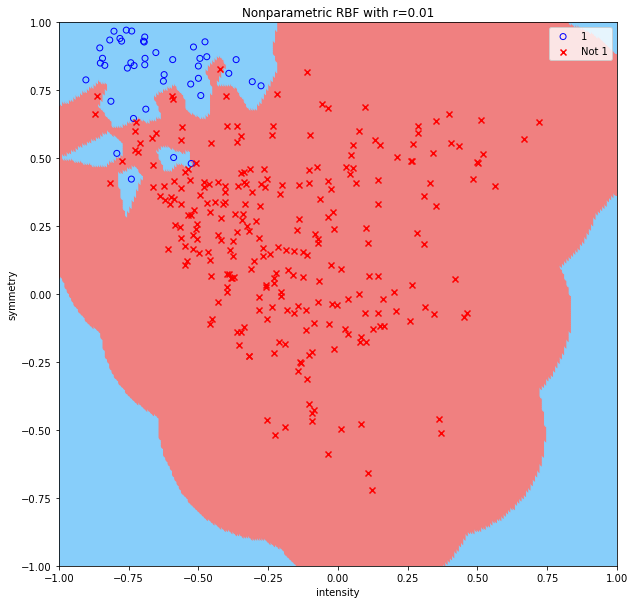

In [43]:
r = 0.01
title = f'Nonparametric RBF with r={r}'
plotNonparametricRBFSeparator(X, y, r=r, title=title)

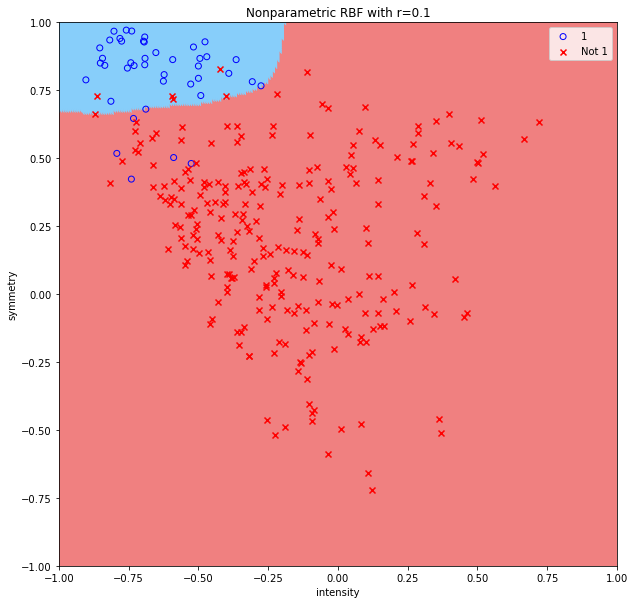

In [44]:
r = 0.1
title = f'Nonparametric RBF with r={r}'
plotNonparametricRBFSeparator(X, y, r=r, title=title)

### Parametric RBF

Given a dataset $X$, $y$ with $N$ data points, and $k<N$ centers $\mu_1,\dots,\mu_k$,

$h(x)=w_0 + \sum_{j=1}^k w_j\phi\big(\frac{\left\| x-\mu_j \right\|}{r}\big)$

$h(x)=w^T \Phi(x)$


Together, $w$ and $\mu_1,\dots,\mu_k$ define a parametric RBF hypothesis



#### Compute Similarity Features


In [ ]:
def similarity(x, centers, r=0.1):
    '''
    Similarity features
    Input:
        x: a d-dimensional numpy vector
        centers: a 2D k x d numpy array
        r: a real number
    Output:
        similarities: a 2D k x 1 numpy array, similarities[j, 0] is the similarity of x to the j-th center
    '''
    k, d = centers.shape
    '''
    TODO-12: Use the functions above to compute the similarity features
    '''
    return similarities

#### Compute (Augmented) Similarity Feature Matrix

In [46]:
def computeAugmentedZWithSimilarities(X, centers, r=0.1):
    '''
    Similarity features
    Input:
        X: a 2D N x d numpy array
        centers: a 2D k x d numpy array
        r: a real number
    Output:
        Z: a 2D N x (k+1) numpy array, 
           Z[:, 0] is a columns of 1s
           Z[n, j] is the similarity of the n-th data point in X with the j-th center
    '''
    N, d = X.shape
    k, dprime = centers.shape
    Z = np.zeros((N, k))
    for n in range(N):
        x = X[n, :]
        similarities = similarity(x, centers, r=r)
        Z[n, :] = similarities.T
    if k < N:
        dummy = np.ones((N, 1))
        Z = np.concatenate((dummy, Z), axis=1)
    Ntilde, dtilde = Z.shape
    assert(Ntilde == N)
    if k < N:
        assert(dtilde == k + 1)
    else:
        assert(dtilde == N)
    return Z

#### Fit the Data

Optimal weights $w^*=Z^\dagger y$

where $Z^\dagger$ is the pseudo-inverse of $Z$

In [ ]:
def fitParametricRBFRegression(X, y, r=0.1, k=3):
    '''
    Fit the Data to Compute the Optimal Weights for the Parametric RBF
    Input:
        X: a 2D N x d numpy array
        y: a 2D N x 1 numpy array
        r: a positive real number
        k: a positive integer, number of centers to use for the parametric RBF
    Output:
        w: a 2D (k+1) x 1 numpy array of optimal weights for regression
        centers: a 2D k x d numpy array of cluster centers for the parametric RBF
    '''
    N, d = X.shape
    '''
    TODO-13: Compute k centers using Lloyd's algorithm
    centers = ?
    '''
    Z = computeAugmentedZWithSimilarities(X, centers, r=r)
    '''
    TODO-14: Compute the optimal weights for regression using the pseudoinverse algorithm
    w = ?
    '''
    return w, centers

#### Making Predictions

$\hat{y}=Zw$

In [ ]:
def predictClassParametricRBF(w, centers, Xtest, r=0.1):
    '''
    Input:
        w: a 2D k x 1 numpy array
        centers: a 2D k x d numpy array
        Xtest: a 2D Ntest x d numpy array
        r: a positive real number
    Output:
        yhat: a 2D N x 1 numpy array
              yhat[n, 0] is the label associated with the n-th example in Xtest
    '''
    Ztest = computeAugmentedZWithSimilarities(Xtest, centers, r=r)
    '''
    TODO-15:
    yhat = ?
    Hint: np.sign(?)
    '''
    return yhat

#### Plotting the Decision Boundary of the Parametric RBF

In [49]:
def plotParametricRBFSeparator(w, centers, X, y, r=0.1, title=''):
    '''
    Plot the "effective" decision boundary and half spaces determined by a parametric RBF hypothesis
    Input:
        w: a 2D (k+1) x 1 numpy array of weights
        centers: a 2D k x d numpy array
                 The j-th row centers[j, :] is the location of the j-th center
        X: a 2D N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0], ..., X[n, d-1] have values of features
        y: a 2D N x 1 numpy array
           y[n, 0] is the label associated with the n-th example
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 250)
    pltx2s = np.linspace(-1, 1, 250)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    pltyhat = predictClassParametricRBF(w, centers, pltX, r=r)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Plot centers
    '''
    k, d = centers.shape
    print(f'centers shape {k, d}')
    pltcentersx1 = centers[:, 1]
    pltcentersx2 = centers[:, 2]
    axs.scatter(pltcentersx1, pltcentersx2, s=100, marker='o', color='black', label=f'centers')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.tight_layout()
    plt.show()

completed 50 clusters with cluster error 1.1551588133422448
centers shape (50, 3)


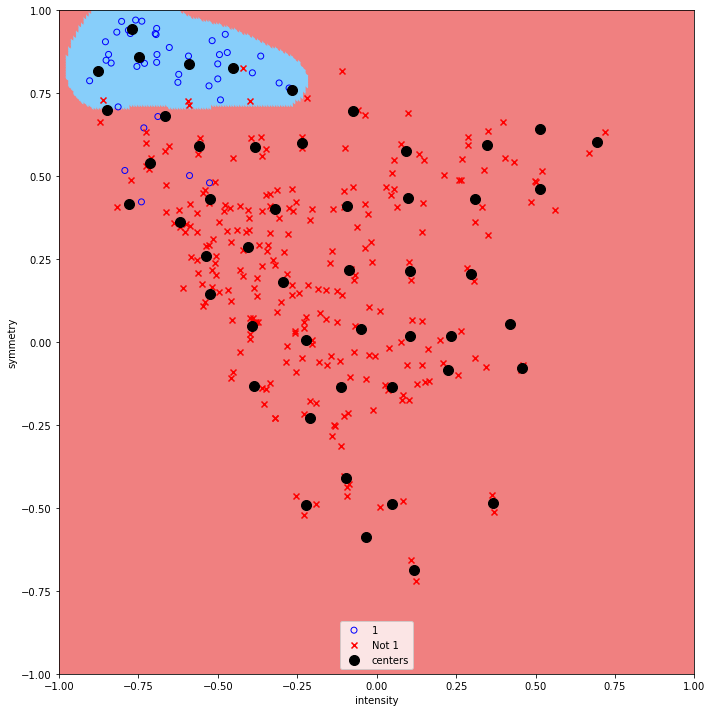

In [51]:
k = 50
r = 0.1
title=f'Parametric RBF, k={k}, r={r}'
w, centers = fitParametricRBFRegression(X, y, r=r, k=k)
plotParametricRBFSeparator(w, centers, X, y, r=r)